In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import sys
sys.path.append("../")
import src.soporte as sp

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.drop(["id"], axis = 1, inplace = True)

In [4]:
sp.analisis_basico(df)

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Estructura de los datos: (40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Número de filas duplicadas:
85
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Columnas, Nulos y Dtypes:


,nulos,dtypes
carat,0,float64
cut,0,object
color,0,object
clarity,0,object
depth,0,float64
table,0,float64
x,0,float64
y,0,float64
z,0,float64
price,0,float64


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Descripción de las variables tipo Numéricas:


,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Descripción de las variables tipo Categóricas:


,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+



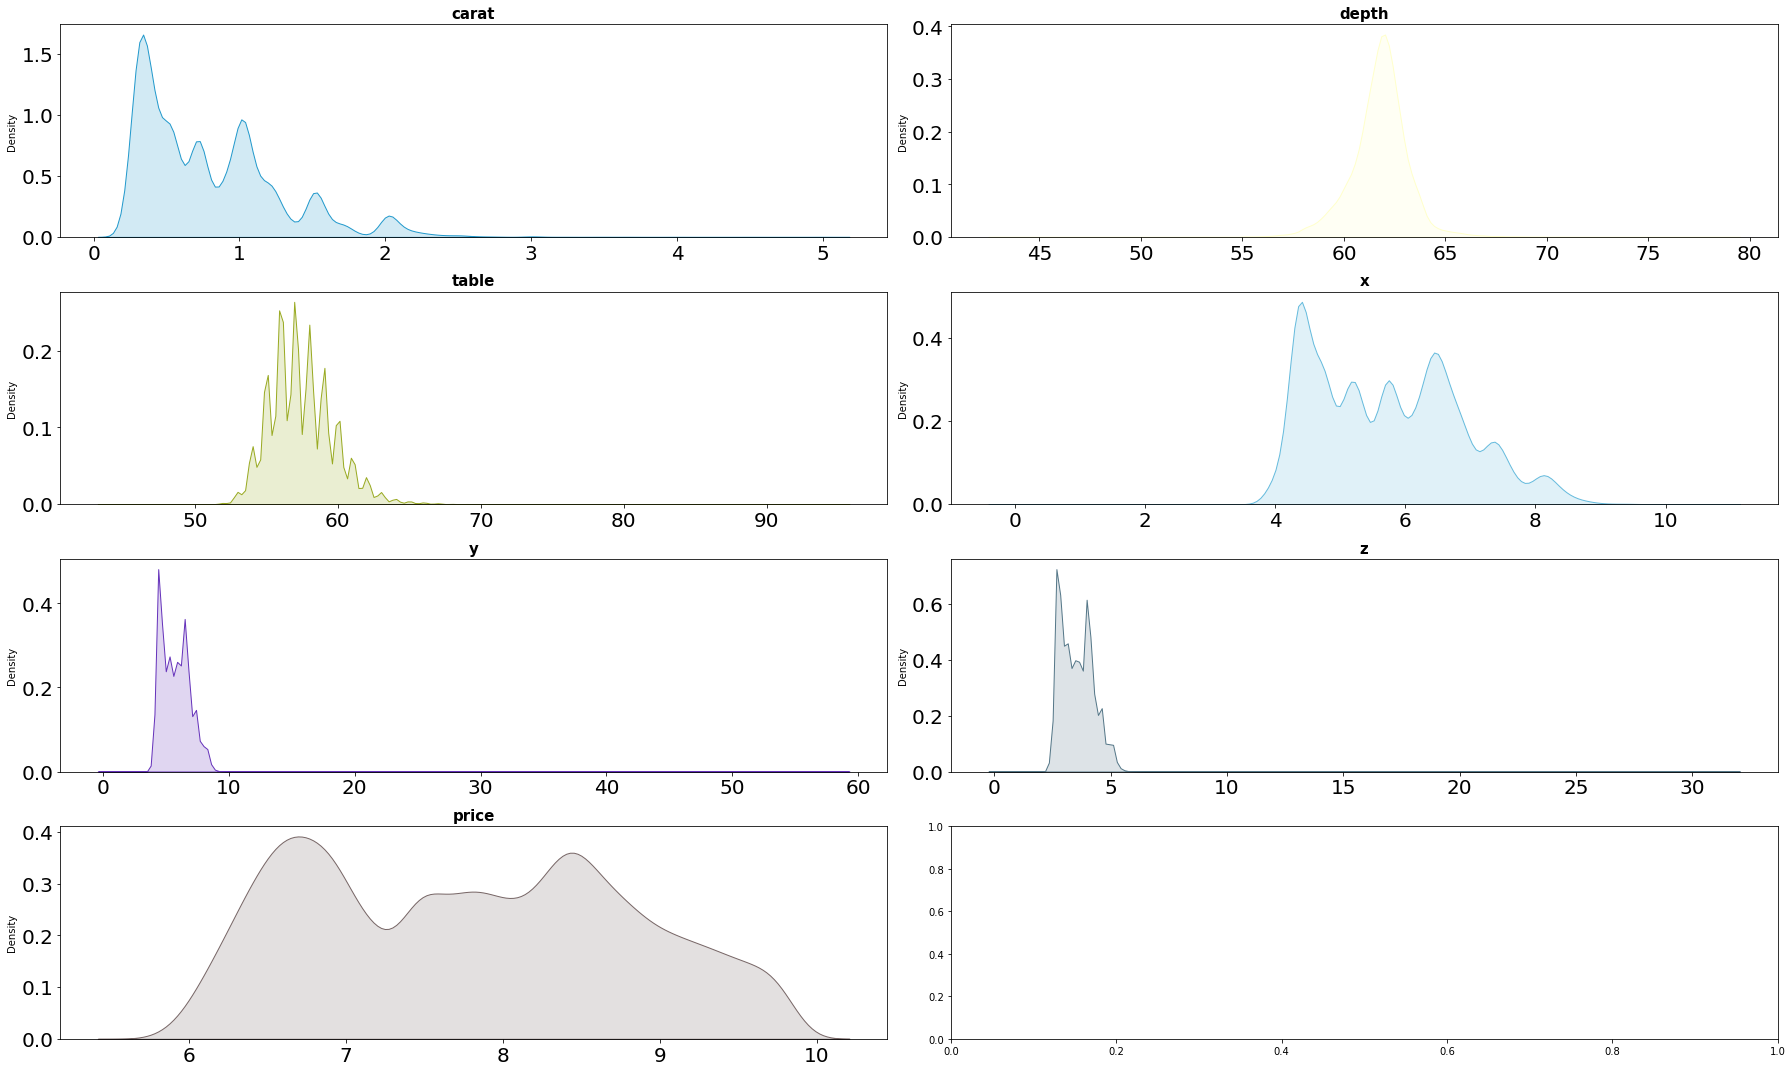

In [5]:
sp.distribucion_numericas(df)

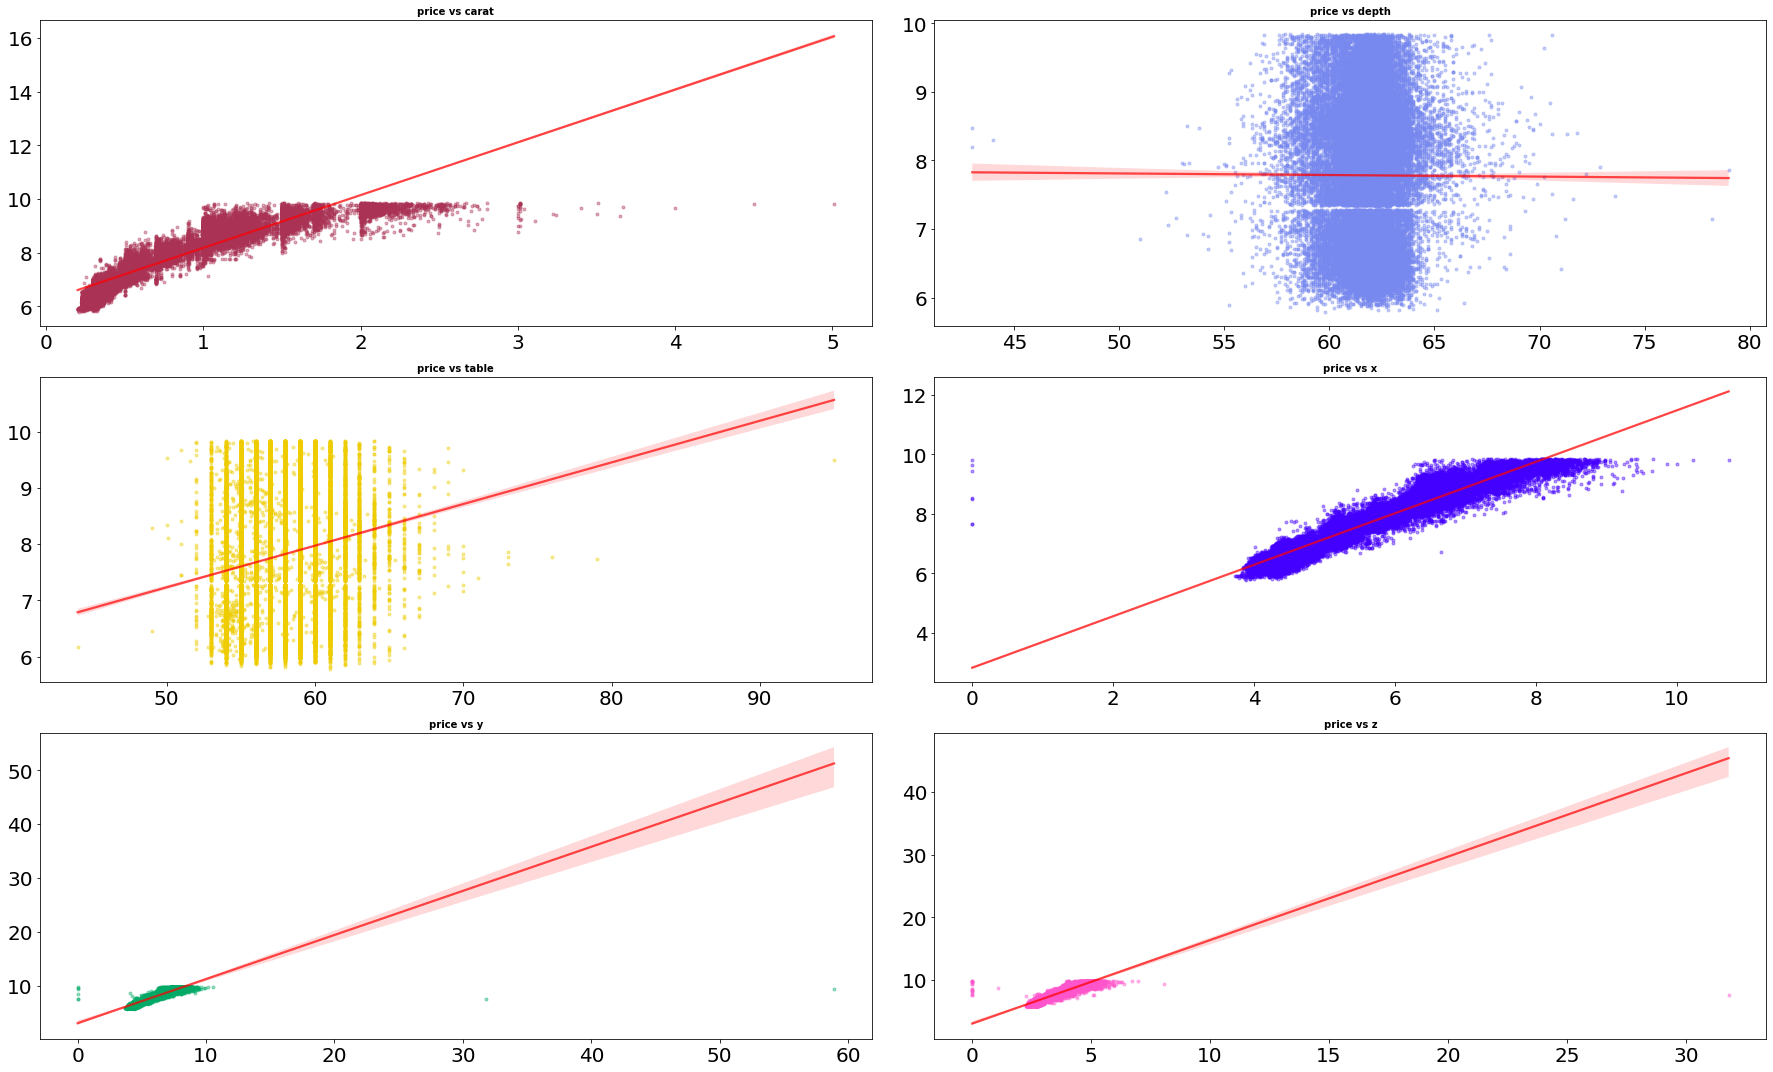

In [6]:
sp.correla_respuesta(df,"price")

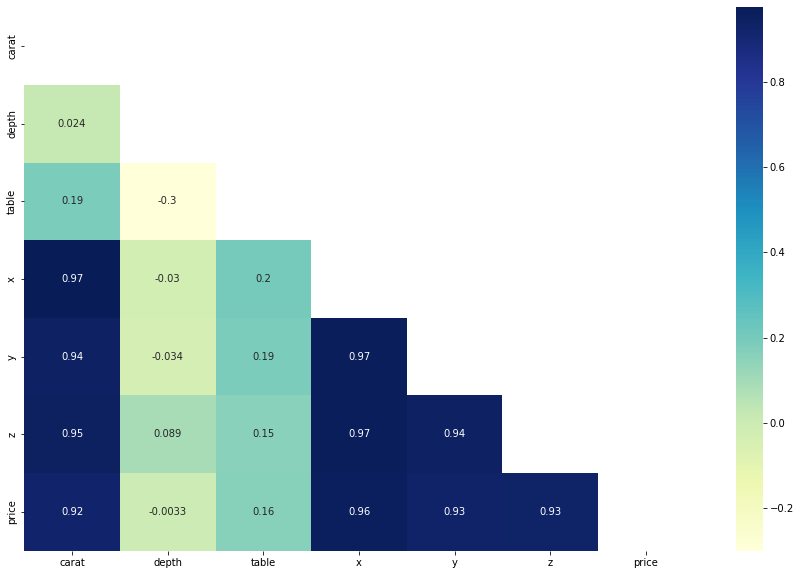

In [7]:
sp.correla_map(df)

In [9]:
import random

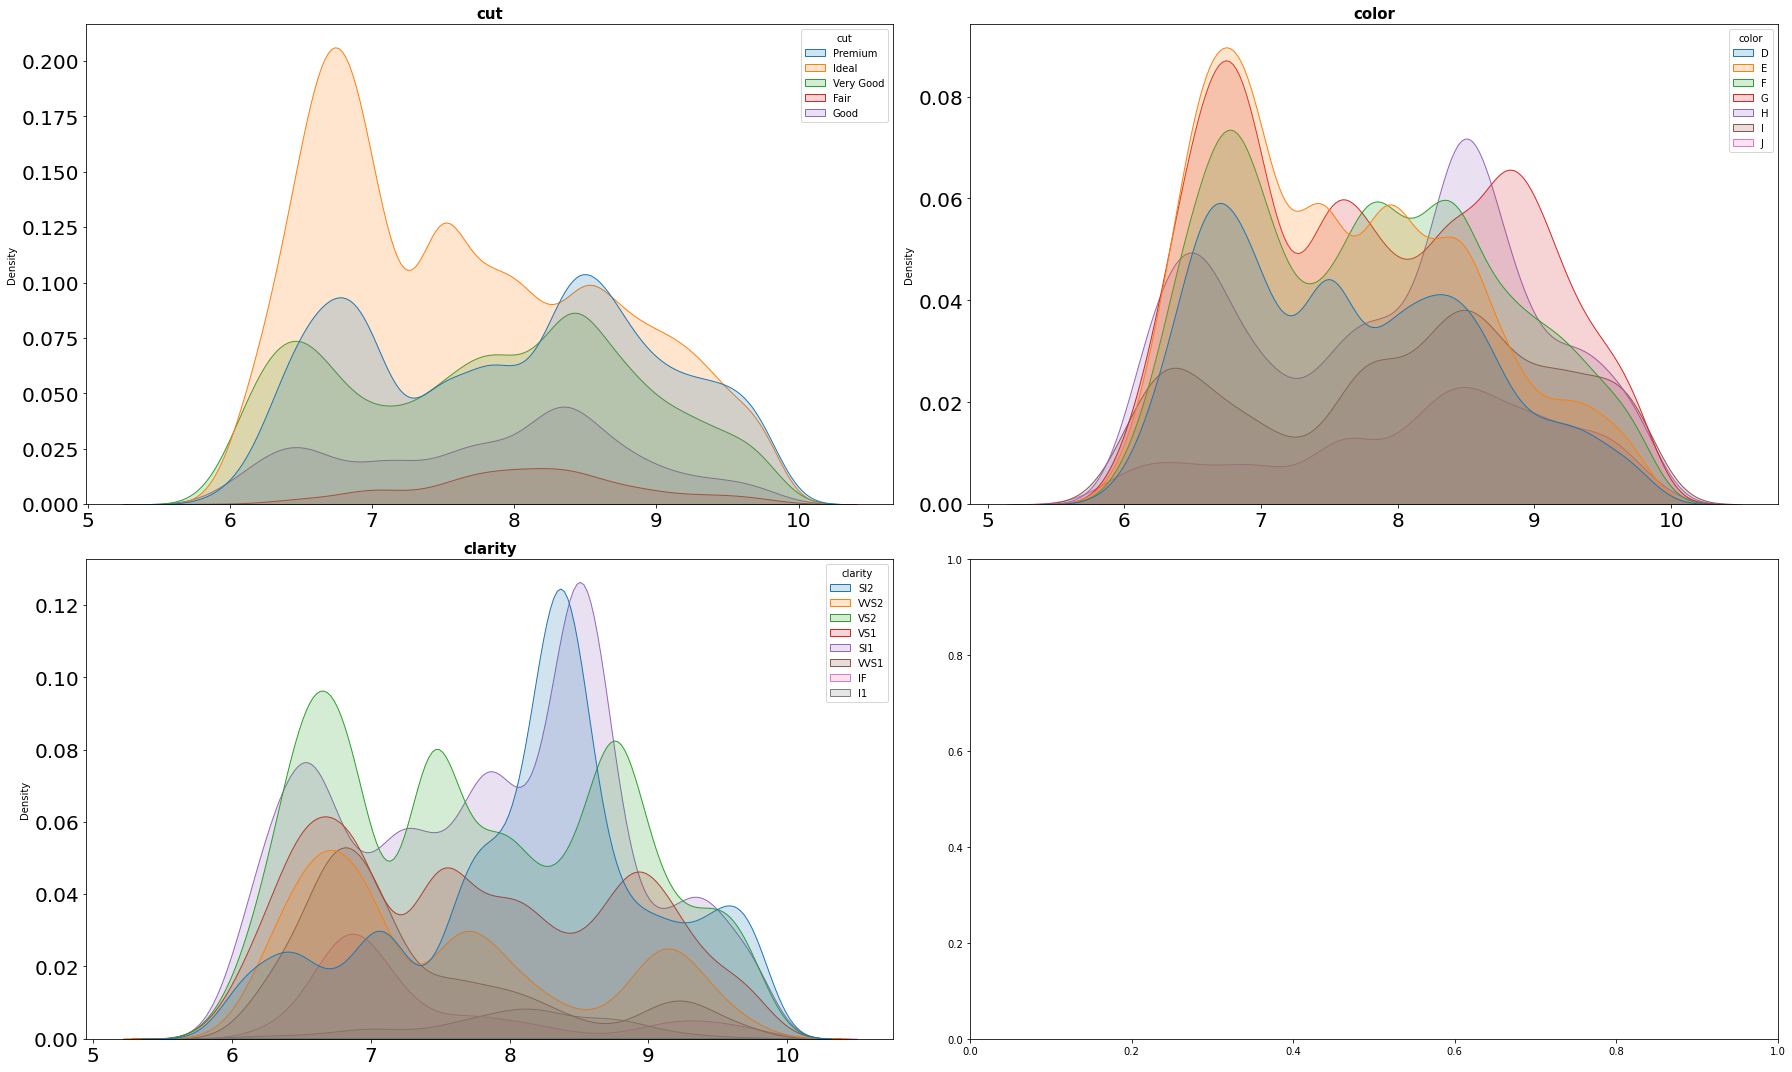

In [12]:
columnas_object = df.select_dtypes(include = "object").columns

fig, axes = plt.subplots(nrows = int(np.ceil(len(columnas_object)/2)), ncols = 2, figsize = (25, 15))
axes = axes.flat

lista_colores = []
n = len(columnas_object)
for i in range(n):
    lista_colores.append('#%03X' % random.randint(0, 0xFFF))

for i, colum in enumerate(columnas_object): 
    sns.kdeplot( 
        data = df,
        x = "price",
        hue = colum,
        color = lista_colores[i], 
        shade = True, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();
